In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

In [13]:
# CSV Load :)
try:
    df = pd.read_csv('_annotations.csv')
    df.columns = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
except FileNotFoundError:
    print("Error: annotations.csv not found. Please make sure the file exists.")
    exit() #Exit if not found

In [4]:
df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,paper16_jpg.rf.09433250e92943aea86ca82e3261c85...,416,416,PAPER,1,34,415,364
1,cardboard820_jpg.rf.09b01468932df74ed2acc3958f...,416,416,CARDBOARD,135,35,289,399
2,glass160_jpg.rf.0953b23bc0daf5d69149493fd55e90...,416,416,GLASS,16,58,398,378
3,paper1569_jpeg.rf.09320ab28d28db478fd550133513...,416,416,PAPER,27,70,411,330
4,paper1395_jpg.rf.09a90c2b7ebcc355732e13987c1c8...,416,416,PAPER,39,90,363,303
...,...,...,...,...,...,...,...,...
51606,paper571_jpg.rf.ec27b74b6480b9ab8a261f66c66f60...,416,416,PAPER,0,0,210,414
51607,metal988_jpg.rf.ec67d0407d7154b8b7237ee65c7fc2...,416,416,METAL,42,48,174,194
51608,metal988_jpg.rf.ec67d0407d7154b8b7237ee65c7fc2...,416,416,METAL,48,226,176,374
51609,metal988_jpg.rf.ec67d0407d7154b8b7237ee65c7fc2...,416,416,METAL,242,221,379,383


## Basic Data Inspection

In [5]:
print("First 5 rows of the DataFrame:\n", df.head())
print("\nDataFrame info:\n")
df.info()
print("\nDataFrame description:\n", df.describe())
print("\nMissing values:\n", df.isnull().sum())

First 5 rows of the DataFrame:
                                             filename  width  height  \
0  paper16_jpg.rf.09433250e92943aea86ca82e3261c85...    416     416   
1  cardboard820_jpg.rf.09b01468932df74ed2acc3958f...    416     416   
2  glass160_jpg.rf.0953b23bc0daf5d69149493fd55e90...    416     416   
3  paper1569_jpeg.rf.09320ab28d28db478fd550133513...    416     416   
4  paper1395_jpg.rf.09a90c2b7ebcc355732e13987c1c8...    416     416   

       class  xmin  ymin  xmax  ymax  
0      PAPER     1    34   415   364  
1  CARDBOARD   135    35   289   399  
2      GLASS    16    58   398   378  
3      PAPER    27    70   411   330  
4      PAPER    39    90   363   303  

DataFrame info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51611 entries, 0 to 51610
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  51611 non-null  object
 1   width     51611 non-null  int64 
 2   height    51611 non-null

## Class Distribution


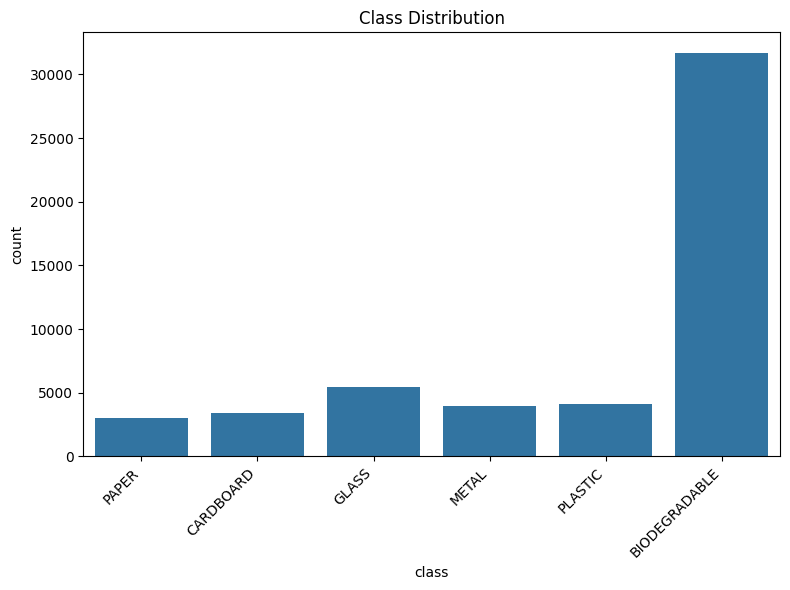


Class Counts:
 class
BIODEGRADABLE    31721
GLASS             5429
PLASTIC           4146
METAL             3948
CARDBOARD         3386
PAPER             2981
Name: count, dtype: int64

Class Percentages:
 class
BIODEGRADABLE    61.461704
GLASS            10.519075
PLASTIC           8.033171
METAL             7.649532
CARDBOARD         6.560617
PAPER             5.775900
Name: proportion, dtype: float64


In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

class_counts = df['class'].value_counts()
print("\nClass Counts:\n", class_counts)
print("\nClass Percentages:\n", df['class'].value_counts(normalize=True) * 100)

## Image Dimension Analysis

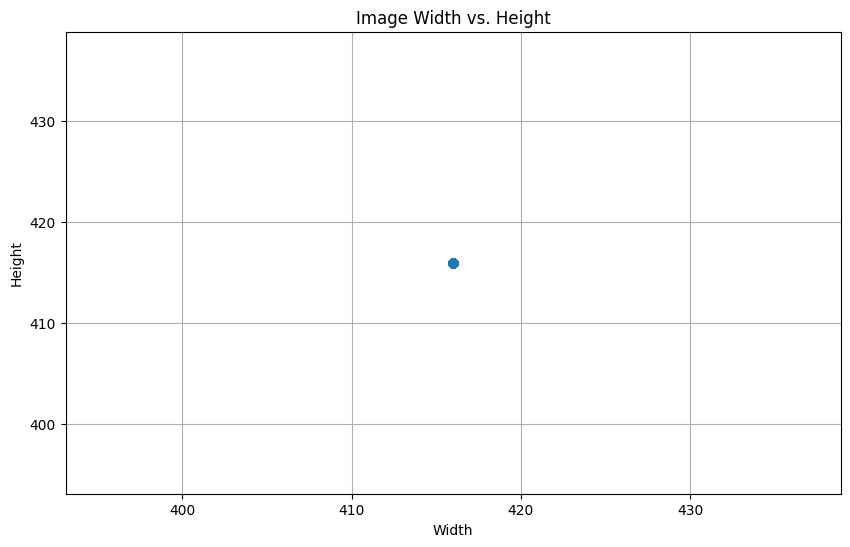


Image Dimension Statistics:
         width   height
count  51611.0  51611.0
mean     416.0    416.0
std        0.0      0.0
min      416.0    416.0
25%      416.0    416.0
50%      416.0    416.0
75%      416.0    416.0
max      416.0    416.0


In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df['width'], df['height'], alpha=0.5)
plt.title('Image Width vs. Height')
plt.xlabel('Width')
plt.ylabel('Height')
plt.grid(True)
plt.show()

print("\nImage Dimension Statistics:")
print(df[['width', 'height']].describe())

## Bounding Box Analysis


Bounding Box Area Statistics:
count     51611.000000
mean      17365.373409
std       33489.159905
min           0.000000
25%         952.000000
50%        3484.000000
75%       15444.000000
max      172225.000000
Name: bbox_area, dtype: float64


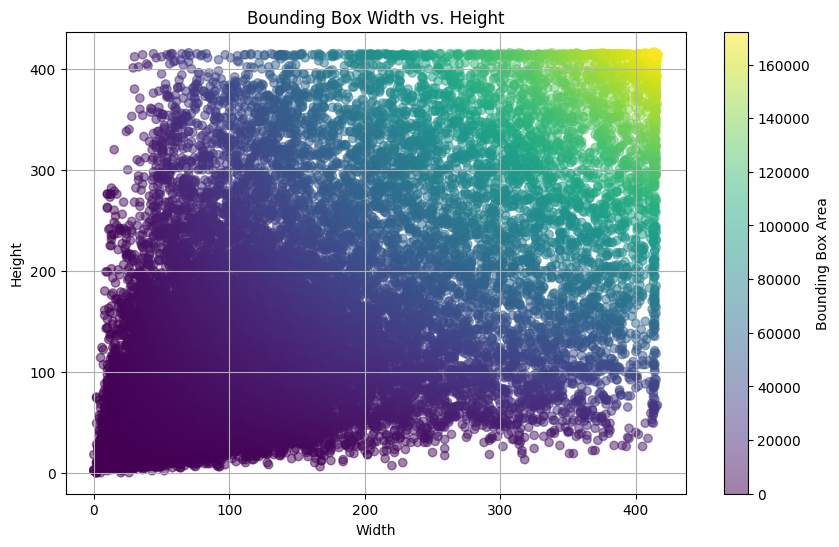

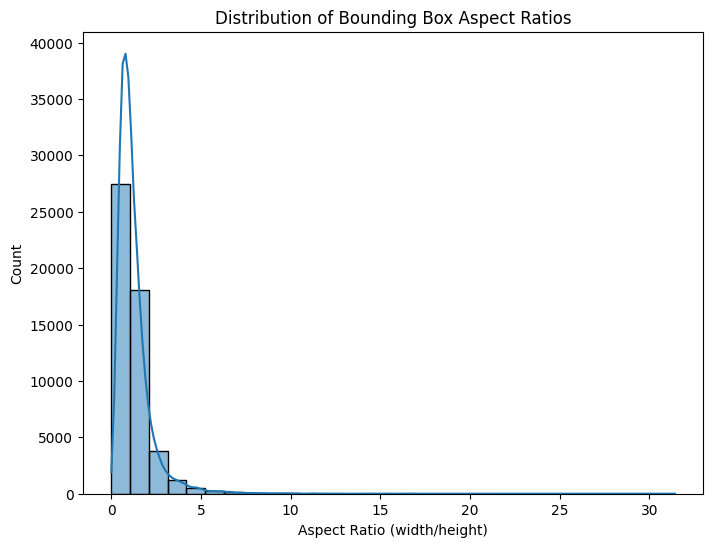


Bounding Box Aspect Ratio Statistics:
count    5.161100e+04
mean              inf
std               NaN
min      0.000000e+00
25%      6.615963e-01
50%      1.000000e+00
75%      1.500000e+00
max               inf
Name: aspect_ratio, dtype: float64


/home/joel/.pyenv/versions/3.10.6/envs/wasteye/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [15]:

df['bbox_area'] = (df['xmax'] - df['xmin']) * (df['ymax'] - df['ymin'])
print("\nBounding Box Area Statistics:")
print(df['bbox_area'].describe())


df['bbox_width'] = df['xmax'] - df['xmin']
df['bbox_height'] = df['ymax'] - df['ymin']


plt.figure(figsize=(10, 6))
plt.scatter(df['bbox_width'], df['bbox_height'], alpha=0.5, c=df['bbox_area'], cmap='viridis') # Color by area
plt.title('Bounding Box Width vs. Height')
plt.xlabel('Width')
plt.ylabel('Height')
plt.colorbar(label='Bounding Box Area') # Add a colorbar
plt.grid(True)
plt.show()


df['aspect_ratio'] = df['bbox_width'] / df['bbox_height']
plt.figure(figsize=(8,6))
sns.histplot(df['aspect_ratio'], bins=30, kde=True)
plt.title("Distribution of Bounding Box Aspect Ratios")
plt.xlabel("Aspect Ratio (width/height)")
plt.show()
print("\nBounding Box Aspect Ratio Statistics:")
print(df['aspect_ratio'].describe())

## Bounding Box Analysis - Bounding Box per Image


Bounding Boxes per Image:
                                             filename  counts
0  biodegradable1001_jpg.rf.7903fa84ae12e27e6ee01...      45
1  biodegradable1002_jpg.rf.b9ead478ce5c0cfe58bc8...       3
2  biodegradable1003_jpg.rf.f77cec0a34271415dcead...       3
3  biodegradable1006_jpg.rf.1e938a1480217657aa692...      37
4  biodegradable1007_jpg.rf.d8266567e472743f618d0...       2
            counts
count  7324.000000
mean      7.046832
std      19.335446
min       1.000000
25%       1.000000
50%       2.000000
75%       5.000000
max     358.000000


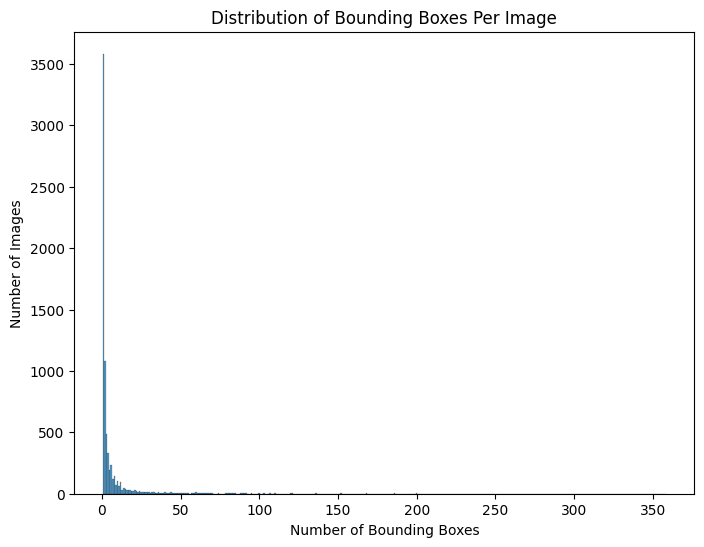

In [11]:
images_per_filepath = df.groupby('filename').size().reset_index(name='counts')
print("\nBounding Boxes per Image:\n", images_per_filepath.head())
print(images_per_filepath.describe())

plt.figure(figsize=(8,6))
sns.histplot(images_per_filepath['counts'], bins=range(1, images_per_filepath['counts'].max()+2), discrete=True) # Show counts of images.
plt.title("Distribution of Bounding Boxes Per Image")
plt.xlabel("Number of Bounding Boxes")
plt.ylabel("Number of Images")
plt.show()